<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 2: Neural Networks with Tensorflow and Keras**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 2 Material

* Part 2.1: Introduction to Neural Networks with Tensorflow and Keras**
* **Part 2.2: Encoding Feature Vectors**
* Part 2.3: Early Stopping and Dropout to Prevent Overfitting
* Part 2.4: Saving and Loading a Keras Neural Network

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.

### Create Custom Function

The cell below creates a custom function called `hms_string()`. This function is needed to record the time required to train your neural network model.

If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

In [2]:
# Create custom function

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

## **Datasets for Class_02_2**

For Class_02_2 we will be using the `Wisconsin Breast Cancer` dataset for the Examples and the `Heart Disease` dataset for the **Exercises**.

### **`Breast Cancer Wisconsin (Diagnostic)` Data Set**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


![___](https://biologicslab.co/BIO1173/images/breast_cancer.png)


The average risk of developing breast cancer in the United States is 13%, or 1 in 8. Approximately 42,000 women in the US die from breast cancer each year. Like most cancers, early detection and treatment is singularily important in preventing mortallity.

The Breast Cancer Wisconsin (BCW) dataset contains detailed microscopic measurements of cell nuclei obtained by fine needle aspirates (FNAs) from breast tumors found in 569 women. Some of these tumors were later determined to be **_malignant_** (cancerous), while other tumors were found to be **_benign_** (non-cancerous). Being able to differentiate cancerous from non-cancerous tumors is of obvious importance.  

Fine needle aspiration (FNA), also called a fine needle aspiration biopsy, is a minimally invasive procedure that uses a thin needle and syringe to extract a sample of cells, tissue, or fluid from an abnormal area or lump in the body. The sample is then examined under a microscope to confirm a diagnosis or guide treatment.

![___](https://biologicslab.co/BIO1173/images/fna_tech.png)


The list of features computed from digitized images of breast mass cell nuclei obtained from by FNA in the Breast Cancer Wisconsing datasete are as follows:

**Attribute Information:**

* **ID number**
* **Diagnosis:** (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

*  **radius:** (mean of distances from center to points on the perimeter)
* **texture:** (standard deviation of gray-scale values)
* **perimeter:**
* **area:**
* **smoothness:** (local variation in radius lengths)
* **compactness:** (perimeter<sup>2</sup> / area - 1.0)
* **concavity:** (severity of concave portions of the contour)
* **concave points:** (number of concave portions of the contour)
* **symmetry:**
* **fractal dimension:** ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)





### **Heart Disease Dataset**

[Heart Disease Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


![___](https://biologicslab.co/BIO1173/images/HD.jpg)

**Description**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

* **Age:** age of the patient [years]
* **Sex:** sex of the patient [M: Male, F: Female]
* **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP:** resting blood pressure [mm Hg]
* **Cholesterol:** serum cholesterol [mm/dl]
* **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
* **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
* **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease:** output class [1: heart disease, 0: Normal]

# **Encoding a Feature Vector for Keras Deep Learning**

Neural networks can accept many types of data. We will continue our focus on tabular data, where there are well-defined rows and columns. This kind of data is what you would typically see in Microsoft Excel spreadsheet.

Neural networks require numeric input. This numeric form is called a **_feature vector_**. Each input neuron receive one feature (or column) from this vector. Each row of training data typically becomes one vector.

In this lesson, we will revist how to encode tabular data stored in a Pandas DataFrame into a feature vector that can be used by two types of neural networks: (1) classification and (2) regression.



### Example 1 - Step 1: Read dataset and store values in a DataFrame

Data is the essence of neural networks and deep learning. Neural networks are of little use until they have been trained on **large** datasets. Only by making repeated adjustments in the weights of their neural connections, during many rounds of training (epochs) on a particular dataset, can a neural network **learn** to make accurate predictions.  

Not surprisingly, building and training neural networks begins with a dataset. The code in the cell below reads the Breast Cancer Wisconsin (BCW) dataset file, `wcbreast.csv`, on the course HTTPS server using the Pandas `pd.read_csv()` function:
~~~text
# Read file and create DataFrame
bcwDF = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/wcbreast.csv",
    index_col=0,
    na_values=['NA','?'])
~~~
As the file is read, the function creates a new DataFrame called `bcwDF`. This name was chosen to remind us that the DataFrame contains the **b** reast **c** ancer **_w_** isconsin dataset.

As a general rule, it is always a good idea to display at least part of your new DataFrame to make sure it was read correctly. Since large DataFrames can have many columns and many, many rows --too many to display in Jupyterlab -- it is helpful to specify the maximum number of rows and columns to display. This is accomplished in the cell below using this code chunk:

~~~text
# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)
~~~



In [3]:
# Example 1 - Step 1: Read data and create dataframe

import numpy as np
import pandas as pd


# Read file and create DataFrame
bcwDF = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/wcbreast.csv",
    index_col=0,
    na_values=['NA','?'])

# Set display options
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display DataFrame
display(bcwDF)

,id,diagnosis,...,worst_symmetry,worst_fractal_dimension
0,842302,M,...,0.4601,0.11890
1,842517,M,...,0.2750,0.08902
...,...,...,...,...,...
567,927241,M,...,0.4087,0.12400
568,92751,B,...,0.2871,0.07039


If the code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image01B.png)


There are several observations that you should make from this table. First, looking at the very bottom you see:
~~~text
569 rows x 32 columns
~~~
This means that our DataFrame `bcwDF` has clinical information for `569` subjects (i.e. 1 row/subject) and that there are `32` clinical features (1 feature/column) recorded for each subject.

By inspection, we can see at least one column, `diagnosis` has non-numerical values (the strings "M" and "B"), but there could be more, since we can only see a small fraction of the entire 32 columns.

### Example 1 - Step 2: Display data types

In order to create a feature vector, we need to know which columns in our DataFrame are non-numeric, i.e., which columns contains string values. We can easily print out the different data types in a DataFrame using the Pandas method `df.info`.   

However, in order see **_all_** of the different data types, we need to change the number of rows to display. While we could simply set this option to `33`, (i.e. the number of columns in the DataFrame), here we used a slightly more elegant method using `len(bcwDF.columns)`. This code will automatically computer the number of columns for us.     

In [4]:
# Example 1 - Step 2: Find data types

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(bcwDF.columns))

# Print data types
bcwDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  se_radius                569 non-null    float64
 13  se_texture               569 non-null    float64
 14  se_perimeter             569 no

If the code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image02B.png)

You should make the following observations from this output:
* The target column is the column that you seek to predict. By convention, the target column, containing the Y-values, will usually, be the rightmost column in a display, or last column in a list. In this particular example, the target column, `diagnosis`, is the second column in the list.   
* There is a column called `id` which identifies each subject. We should exclude this columns from our analysis because it contains no information useful for making a prediction.
* From the data types output, we can see that with the exception of the column `diagnois`, all of the fields, are **_numeric_**. Non-numeric values are classified as `object` while numeric values are classified as being either `int64` or `float64`. Numeric columns might not require further processing before there are used to generate our X-values.
* Categorical values (strings) are only found in the target column (`diagnosis`) which we will take care of later when we generate our Y-values.


### **Exercise 1 - Step 1: Read dataset and store values in a DataFrame**

In the cell below, use the Pandas function `pd.read_csv()` to read the Heart Disease data file `heart_disease.csv` located on the course HTTPS server. Save the data to a new DataFrame called `hdDF`.

_Code Hints:_

1. In order to read this file correctly, you **must** comment out the following line of code:

~~~text    
# index_col=0,
~~~

If you don't comment out that line the column `Age` will not be placed in your DataFrame `hdDF` correctly.

Set the display for 6 rows and 6 columns and then print out a display of `hdDF`.


In [5]:
# Insert your code for Exercise 1 - Step 1 here

import numpy as np
import pandas as pd


# Read file and create DataFrame
hdDF = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/heart_disease.csv",
#    index_col=0,
    na_values=['NA','?'])

# Set display options
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display DataFrame
display(hdDF)

,Age,Sex,ChestPainType,...,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,...,0.0,Up,0
1,49,F,NAP,...,1.0,Flat,1
2,37,M,ATA,...,0.0,Up,0
...,...,...,...,...,...,...,...
915,57,M,ASY,...,1.2,Flat,1
916,57,F,ATA,...,0.0,Flat,1
917,38,M,NAP,...,0.0,Up,0


If your code is correct, you should see the following table.

![Heart Failure DataFrame](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01a.png)

Check your output carefully. From left to right, there should be an unamed index column with descending numbers (i.e, 0, 1, 2, ...) and just to the right of the index column there should be a column called `Age`. If your output doesn't have an index column, and the column `Age` is the first column on the left, go back and re-read the instruction for **Exercise 1A**.

Your `hdDF` DataFrame has information on `918` subjects (number of rows = 918) and `12` clinical values for each subject (number of columns = 12). There are clearly more than one column with non-numeric values, but you won't know exactly how many until you run **Exercise 1B**.

### **Exercise 1 - Step 2: Display data types**

In the cell below, write the code to print out the different data types in your DataFrame `hdDF` using the Pandas method `df.info()`. Use `len(hdDF.columns)` to set the number of rows to display, before you print out the data types.     

In [6]:
# Insert your code for Exercise 1 - Step 2 here

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(hdDF.columns))

# Print data types
hdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


If the code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image03B.png)

You should make the following observations from the above output:
* The target column is the column that you usually want to predict with a classification neural network. In this instance, the last column in this list, `HeartDisease`, will be your target column (Y-values).
* The column `FastingBS` doesn't appear to contain information that would be especially useful for predicting heart disease, so you will need to drop it.
* Some fields are numeric (data type `int64` or `float64`) and might not require further processing.
* There are categorical values (data type `object`) in 5 columns including: `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina` and `ST_Slope`. The categorical values (strings) in these columns will need to be taken care of, before you can use them in generating your X-values.

### Example 2: Drop unecessary columns

The `id` column in the `bcwDF` DataFrame does not contain information useful for predicting breast cancer, so it will be excluded from the feature vector containing the X-values. To do this we will use the Pandas method `df.drop()` as shown by the next code chunk:
~~~text
bcwDF.drop('id', axis=1, inplace=True)
~~~
The argument `axis=1` means to drop the entire column, while the argument `inplace=True` means to change the DataFrame **_permanently_**.

**NOTE:** After you run a code cell where you drop a column, you will get an error if you try to re-run the same cell, since there is no longer any column to drop.

If you need to run the cell again, you will first need to re-read the datafile and re-create the DataFrame `bcwDF` with **all** of the original columns.

In [7]:
# Example 2: Drop unecesary columns

import pandas as pd


# Drop specific column
bcwDF.drop('id', axis=1, inplace=True)

# Set the max rows and max columns
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 4)

# Display the updated DataFrame
display(bcwDF)

,diagnosis,mean_radius,...,worst_symmetry,worst_fractal_dimension
0,M,17.99,...,0.4601,0.11890
1,M,20.57,...,0.2750,0.08902
...,...,...,...,...,...
567,M,20.60,...,0.4087,0.12400
568,B,7.76,...,0.2871,0.07039


If you code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image02a.png)

You should note that the column `id` has been removed. Instead of the original `32` columns, there are now only `31` columns.

**NOTE:** If you get an error that column `id` doesn't exist, it probably means that you have already run this cell and dropped the column. To correct this error, simply go back and re-read the datafile to create a fresh copy of `bcwDF`.

### **Exercise 2: Drop unecessary columns**

Since the column `FastingBS` in the Heart Disease dataset doesn't contain information that will be especially useful for predicting heart disease, this column should not be included in the analysis. In the cell below, write the code to drop this column. Set your display 6 rows and 6 columns of your updated DataFrame and print out your updated DataFrame `hdDF`.

In [8]:
# Insert your code for Exercise 2 here

import pandas as pd

# Drop specific column
hdDF.drop('FastingBS', axis=1, inplace=True)

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(hdDF)

,Age,Sex,ChestPainType,...,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,...,0.0,Up,0
1,49,F,NAP,...,1.0,Flat,1
2,37,M,ATA,...,0.0,Up,0
...,...,...,...,...,...,...,...
915,57,M,ASY,...,1.2,Flat,1
916,57,F,ATA,...,0.0,Flat,1
917,38,M,NAP,...,0.0,Up,0


If your code is correct you should see the following table:

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image04B.png)

Since the column `FastingBS` wasn't displayed previously (**Example 1A**), you can't tell if it was dropped. However, the number of columns is now `11`, instead of the original `12` so you can assume your code was successful.

**NOTE:** If you get an error that column `FastingBS` doesn't exist, it probably means that you have already run this cell and dropped the column. To correct this error, simply go back and re-read the datafile to create a fresh copy of `hdDF` by running all of the code cells starting with **Exercise 1** again.

### Example 3: One-Hot Encode Categorical Variables

In general neural networks can only process **numerical** data, not string (categorical) data.

Your `hdDF` DataFrame has 5 columns that have categorical variables (strings):
1. `Sex`
2. `ChestPainType`
3. `RestingECG`
4. `ExerciseAngina`
5. `ST_Slope`.

You will need to One-Hot Encode each of these `5` columns separately.

To help you get started, Example 3 illustrates how to One-Hot encode the first column, `Sex`.

The following line of code uses the Pandas function, `pd.get_dummies()` to One-Hot encode the string values in the `Sex` column and turn them into the integer values `0` and `1`.

You should notice that the code below uses `try:` and `except:` blocks. Normally, you would **not** use `try` and `except` when creating a feature vector. They have been added here simply as a teaching aid.

The `try` block lets you test a block of code for errors while the `except` block lets you handle the error. The `try` block demonstrates the 3 steps you need to One-Hot Encode the column `Sex`. The `except` block is there in case you try to re-run this cell after you have already dropped the column `Sex`. Instead of giving an error message and stopping, the `except` block simply warns you that the column has already been dropped.


In [9]:
# Example 3: One-Hot encode categorical variables

import pandas as pd

# Adding try and except blocks as teaching aid-------------------------
try:
    # Step 1 - Get dummy values
    dummies = pd.get_dummies(hdDF['Sex'],prefix="Sex", dtype=int)

    # Step 2 - Add dummies to DataFrame
    hdDF = pd.concat([hdDF,dummies],axis=1)

    # Step 3- Drop column replaced by dummies
    hdDF.drop('Sex', axis=1, inplace=True)
    print("Column 'Sex' has been dropped")

except:
    print("ERROR: Column 'Sex' may have been already been dropped")

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(hdDF)

Column 'Sex' has been dropped


,Age,ChestPainType,RestingBP,...,HeartDisease,Sex_F,Sex_M
0,40,ATA,140,...,0,0,1
1,49,NAP,160,...,1,1,0
2,37,ATA,130,...,0,0,1
...,...,...,...,...,...,...,...
915,57,ASY,130,...,1,0,1
916,57,ATA,130,...,1,1,0
917,38,NAP,138,...,0,0,1


If your code is correct, you should see the following table.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image04a.png)


You should notice that the original column `Sex` has been replaced by two new columns called `Sex_F` and `Sex_M`. You should also notice that these two new columns contain either the number `0` or the number `1`. This is what **`One Hot Encoding`** does. One-Hot Encoding replaces the categorical (string) values with integer values, in this case `M` or `F` have been replaced by the numbers `0` and `1`.  

### **Exercise 3: One-Hot encode categorical variables**

Your `hdDF` DataFrame still has 4 columns with categorical variables:
1. `ChestPainType`
2. `RestingECG`
3. `ExerciseAngina`
4. `ST_Slope`.

For **Exercise 3**, you are to One-Hot Encode these remaining `4` columns using the example shown in Example 3. To help you with your coding, **Exercise 3** has been divided into a series of steps.

### **Exercise 3 - Step 1: One-Hot encode the column `ChestPainType`**

In the cell below, `One-Hot Encode` the column `ChestPainType` in the Heart Disease DataFrame `hdDf`. Use the word `Pain` as the dummy `prefix`.

After you add the dummies back into to the DataFrame, drop the column `ChestPainType`.

Set the display for 6 columns and 6 rows and print out a display of your updated DataFrame.

In [10]:
# Insert your code for Exercise 3 - Step 1 here

import pandas as pd

# Adding try and except blocks as teaching aid-------------------------
try:
    # Step 1 - Get dummy values
    dummies = pd.get_dummies(hdDF['ChestPainType'],prefix="Pain", dtype=int)

    # Step 2 - Add dummies to DataFrame
    hdDF = pd.concat([hdDF,dummies],axis=1)

    # Step 3- Drop column replaced by dummies
    hdDF.drop('ChestPainType', axis=1, inplace=True)
    print("Column 'ChestPainType' has been dropped")

except:
    print("ERROR: Column 'ChestPainType' may have been already been dropped")

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(hdDF)

Column 'ChestPainType' has been dropped


,Age,RestingBP,Cholesterol,...,Pain_ATA,Pain_NAP,Pain_TA
0,40,140,289,...,1,0,0
1,49,160,180,...,0,1,0
2,37,130,283,...,1,0,0
...,...,...,...,...,...,...,...
915,57,130,131,...,0,0,0
916,57,130,236,...,1,0,0
917,38,138,175,...,0,1,0


If your code is correct, you should see the following table.

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image05B.png)


### **Exercise 3 - Step 2: One-Hot encode the column `RestingECG`**

In the cell below, One-Hot encode the column `RestingECG` in the Heart Disease DataFrame, `hdDF`. Use the word `RestingECG` as the dummy `prefix`.

Add the dummies to the DataFrame and then drop the column `RestingECG`. Set the display for 6 columns and 6 rows and print out a display of your updated DataFrame.

In [11]:
# Insert your code for Exercise 3 - Step 2 here


import pandas as pd

# Adding try and except blocks as teaching aid-------------------------
try:
    # Step 1 - Get dummy values
    dummies = pd.get_dummies(hdDF['RestingECG'],prefix="RestingECG", dtype=int)

    # Step 2 - Add dummies to DataFrame
    hdDF = pd.concat([hdDF,dummies],axis=1)

    # Step 3- Drop column replaced by dummies
    hdDF.drop('RestingECG', axis=1, inplace=True)
    print("Column 'RestingECG' has been dropped")

except:
    print("ERROR: Column 'ResingECG' may have been already been dropped")

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(hdDF)

Column 'RestingECG' has been dropped


,Age,RestingBP,Cholesterol,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289,...,0,1,0
1,49,160,180,...,0,1,0
2,37,130,283,...,0,0,1
...,...,...,...,...,...,...,...
915,57,130,131,...,0,1,0
916,57,130,236,...,1,0,0
917,38,138,175,...,0,1,0


If your code is correct, you should see the following table.

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image06B.png)

### **Exercise 3 - Step 3: One-Hot encode the column `ExerciseAngina`**

In the cell below, One-Hot encode the column `ExerciseAngina` in the Heart Disease DataFrame, `hdDF`. Use the word `ExAngina` as the dummy `prefix`.

Add the dummies to the DataFrame and then drop the column `ExerciseAngina`. Set the display for 6 columns and 6 rows and print out a display of your updated DataFrame.

In [12]:
# Insert your code for Exercise 3 - Step 3 here

import pandas as pd

# Adding try and except blocks as teaching aid-------------------------
try:
    # Step 1 - Get dummy values
    dummies = pd.get_dummies(hdDF['ExerciseAngina'],prefix="ExAngina", dtype=int)

    # Step 2 - Add dummies to DataFrame
    hdDF = pd.concat([hdDF,dummies],axis=1)

    # Step 3- Drop column replaced by dummies
    hdDF.drop('ExerciseAngina', axis=1, inplace=True)
    print("Column 'ExerciseAngina' has been dropped")

except:
    print("ERROR: Column 'ExerciseAngina' may have been already been dropped")

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(hdDF)

Column 'ExerciseAngina' has been dropped


,Age,RestingBP,Cholesterol,...,RestingECG_ST,ExAngina_N,ExAngina_Y
0,40,140,289,...,0,1,0
1,49,160,180,...,0,1,0
2,37,130,283,...,1,1,0
...,...,...,...,...,...,...,...
915,57,130,131,...,0,0,1
916,57,130,236,...,0,1,0
917,38,138,175,...,0,1,0


If your code is correct, you should see the following table.

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image07B.png)


### **Exercise 3 - Step 4: One-Hot encode the column `ST_Slope`**

In the cell below, One-Hot encode the column `ST_Slope` in the Heart Disease DataFrame, `hdDF`. Add the dummies to the DataFrame and then drop the column `ST_Slope`. Set the display for 6 columns and 6 rows and print out a display of your updated DataFrame.

In [13]:
# Insert your code for Exercise 3 - Step 4 here

import pandas as pd

# Adding try and except blocks as teaching aid-------------------------
try:
    # Step 1 - Get dummy values
    dummies = pd.get_dummies(hdDF['ST_Slope'],prefix="ST_Slope", dtype=int)

    # Step 2 - Add dummies to DataFrame
    hdDF = pd.concat([hdDF,dummies],axis=1)

    # Step 3- Drop column replaced by dummies
    hdDF.drop('ST_Slope', axis=1, inplace=True)
    print("Column 'ST_Slope' has been dropped")

except:
    print("ERROR: Column 'ST_Slope' may have been already been dropped")

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(hdDF)


Column 'ST_Slope' has been dropped


,Age,RestingBP,Cholesterol,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,...,0,0,1
1,49,160,180,...,0,1,0
2,37,130,283,...,0,0,1
...,...,...,...,...,...,...,...
915,57,130,131,...,0,1,0
916,57,130,236,...,0,1,0
917,38,138,175,...,0,0,1


If the code is correct you should see the following table.

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image08B.png)  

You should notice that the number of columns in your DataFrame, `hdDF`, has increased from the `12` original columns to total of **20** columns!. This a clear example of **_column inflation_** in an invariable consequence of using One-Hot Encoding.

### Sample Code: Print out column names

If your coding has been correct so far, your DataFrame, `hdDF` should have 20 columns. This is an inconviently large number of columns to display on your computer screen. In this situation, you can use the code in the cell below to print out a complete list of all the column names in DataFrame:
~~~text
# Use for loop
for idx, col in enumerate(hdDF.columns, start=1):
    print(f"{idx}. {col}")
~~~
Run the next cell to check whether your coding is correct so far, before going on to the next part of the lesson.

In [14]:
# Print columns name in updated hdDR

# Use for loop
for idx, col in enumerate(hdDF.columns, start=1):
    print(f"{idx}. {col}")


1. Age
2. RestingBP
3. Cholesterol
4. MaxHR
5. Oldpeak
6. HeartDisease
7. Sex_F
8. Sex_M
9. Pain_ASY
10. Pain_ATA
11. Pain_NAP
12. Pain_TA
13. RestingECG_LVH
14. RestingECG_Normal
15. RestingECG_ST
16. ExAngina_N
17. ExAngina_Y
18. ST_Slope_Down
19. ST_Slope_Flat
20. ST_Slope_Up


If the code is correct you should see the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image09B.png)  

If your output from doesn't match the output above, figure out which columns were not successfully `One-Hot Encoded`, and/or dropped, and make the necessary code fixes.

When you are making significant changes to a DataFrame, its always a good idea to go back to where you originally created the DataFrame, in the lesson, **Exercise 1 - Step 1**, re-run this cell make a new copy of `hdDF` and then re-run your code cells.

**WARNING:** If your output does _not_ start with the name `Age`, it probably means that you didn't read the datafile correctly. You need to go back and re-read the instructions if you want this lesson to receive a passing grade.

## **Generate X and Y for a Classification Neural Network**

Now that unecessary columns have been dropped, and all of the string data has been `One-Hot Encoded` (except for the target column), we are ready to use the data stored in the updated DataFrame as input for a neural network.

There are two basic ways to used tabular data as input into a neural network. The neural network can perform **_classification_** or **_regression_**. There are small number of very important differences in how you generate X and Y values for these different functions.

We will begin creating a feature vector for a **classification** neural network.

### Example 4: Create Feature Vector for _Classification_ Neural Network

The goal of a **classification neural network** is to accurately categorize input data (X-values) into predefined classes or categories (Y-values). The network learns to identify patterns and features within the input data that are associated with each class, allowing it to make predictions about the class of new, unseen data. During training (fitting), the neural network tries to minimize the classification error as a way to improve the overall accuracy of the network's predictions.

The code in the cell below creates a function called `make_feature_vector()`. To use this function you must first specify the column name in the DataFrame containing the Y-values. For the DataFrame `bcwDF` the Y-values are in the column called **`diagnosis`** so we set the target name using the following line of code:
```text
target_name='diagnosis'
```

The `make_feature_vector()` function generates the `X values` using this code snippet:
```text
    # ----------------------------------------------------------------
    #  2️⃣  Feature matrix – drop the target column
    # ----------------------------------------------------------------
    bcwX = df.drop(columns=target_col).to_numpy(dtype=dtype)
```
And then generates the `Y values` using this code snippet:
```text
    # ----------------------------------------------------------------
    #  3️⃣  Target matrix – one‑hot encode the diagnosis column
    # ----------------------------------------------------------------
    bcwY = pd.get_dummies(df[target_col], dtype=int).to_numpy(dtype=dtype)

    return bcwX, bcwY
```
The feature vectors are generated by calling the `make_feature_vectors()` function with the appropiate arguments, such as the name of the DataFrame `bcwDF`, as shown in this code snippet:
```text
# ------------------------------------------------------------------
#  4️⃣  Make feature vector
# ------------------------------------------------------------------

bcwX, bcwY = make_feature_vector(bcwDF)   # Run the helper
```

You should note that the function gives the X values the name `bcwX` and the Y values the name `bcwY`. We will have to use these names below when we build our classification neural network.

In [ ]:
import numpy as np
import pandas as pd

# Set target name
target_name = 'diagnosis'

# ------------------------------------------------------------------
# 1️⃣ Sanity check – make sure the target column exists
# ------------------------------------------------------------------
if target_name not in bcwDF.columns:
    raise KeyError(f"'{target_name}' column not found in the dataframe.")

# ------------------------------------------------------------------
# 2️⃣ Feature matrix – drop the target column
# ------------------------------------------------------------------
bcwX = bcwDF.drop(columns=target_name).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 3️⃣ Target matrix – one-hot encode the diagnosis column
# ------------------------------------------------------------------
bcwY = pd.get_dummies(bcwDF[target_name], dtype=int).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 4️⃣ Quick sanity-check prints (useful for Colab output)
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {bcwX.shape}")
print(f"Target matrix shape: {bcwY.shape}")

print("\nFirst 4 feature vectors:")
print(bcwX[:4])

print("\nCorresponding one-hot targets:")
print(bcwY[:4])


Feature matrix shape: (569, 30)
Target matrix shape: (569, 2)

First 4 feature vectors:
[[  17.99     10.38    122.8    1001.        0.1184    0.2776    0.3001
     0.1471    0.2419    0.0787    1.095     0.9053    8.589   153.4
     0.0064    0.049     0.0537    0.0159    0.03      0.0062   25.38
    17.33    184.6    2019.        0.1622    0.6656    0.7119    0.2654
     0.4601    0.1189]
 [  20.57     17.77    132.9    1326.        0.0847    0.0786    0.0869
     0.0702    0.1812    0.0567    0.5435    0.7339    3.398    74.08
     0.0052    0.0131    0.0186    0.0134    0.0139    0.0035   24.99
    23.41    158.8    1956.        0.1238    0.1866    0.2416    0.186
     0.275     0.089 ]
 [  19.69     21.25    130.     1203.        0.1096    0.1599    0.1974
     0.1279    0.2069    0.06      0.7456    0.7869    4.585    94.03
     0.0061    0.0401    0.0383    0.0206    0.0225    0.0046   23.57
    25.53    152.5    1709.        0.1444    0.4245    0.4504    0.243
     0.3613    0

If the code is correct you should see the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image10B.png)  


### **Exercise 4: Create Feature Vectors for _Classification_ Neural Network**

In the cell below, create X and Y feature vectors for a classification neural network. Use the column `HeartDisease` for your Y-values, and all of the other columns for your X-values.

**Code Hints:**

1. Set the target name to "HeartDisease"
2. Change `bcwX` to `hdX`
3. Change `bcwY` to `hdY`

4. Change this line of code:
```text
bcwX, bcwY = make_feature_vector(bcwDF)   # Run the helper
```
to read as
```text
hdX, hdY = make_feature_vector(hdDF)   # Run the helper
```
Don't forget to change the names for X and Y in the print statements at the end of the code cell.

In [ ]:
# Insert your code for Exercise 4 here

import numpy as np
import pandas as pd

# Set target name
target_name = 'HeartDisease'

# ------------------------------------------------------------------
# 1️⃣ Sanity check – make sure the target column exists
# ------------------------------------------------------------------
if target_name not in hdDF.columns:
    raise KeyError(f"'{target_name}' column not found in the dataframe.")

# ------------------------------------------------------------------
# 2️⃣ Feature matrix – drop the target column
# ------------------------------------------------------------------
hdX = hdDF.drop(columns=target_name).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 3️⃣ Target matrix – one-hot encode the diagnosis column
# ------------------------------------------------------------------
hdY = pd.get_dummies(hdDF[target_name], dtype=int).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 4️⃣ Quick sanity-check prints (useful for Colab output)
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {hdX.shape}")
print(f"Target matrix shape: {hdY.shape}")

print("\nFirst 4 feature vectors:")
print(hdX[:4])

print("\nCorresponding one-hot targets:")
print(hdY[:4])



Feature matrix shape: (918, 19)
Target matrix shape: (918, 2)

First 4 feature vectors:
[[ 40.  140.  289.  172.    0.    0.    1.    0.    1.    0.    0.    0.
    1.    0.    1.    0.    0.    0.    1. ]
 [ 49.  160.  180.  156.    1.    1.    0.    0.    0.    1.    0.    0.
    1.    0.    1.    0.    0.    1.    0. ]
 [ 37.  130.  283.   98.    0.    0.    1.    0.    1.    0.    0.    0.
    0.    1.    1.    0.    0.    0.    1. ]
 [ 48.  138.  214.  108.    1.5   1.    0.    1.    0.    0.    0.    0.
    1.    0.    0.    1.    0.    1.    0. ]]

Corresponding one-hot targets:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


If the code is correct you should see the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image11B.png)  

You might notice that there are a lot of `1s` and `0s` in your `X feature vector`. This is because you `One-Hot Encoded` several non-numeric columns in **Exercise 3**.

### Example 5A:  Construct, Compile and Train _Classification_ Neural Network

When building a **classification** neural network, there are two important points to remember:

* Classification neural networks have an output neuron count equal to the number of classes.
* Classification neural networks should use the **softmax** activation function in the output layer and **categorical_crossentropy** as the loss function when you compile your neural network.

The code in the cell below starts out by defining several parmeters using the following code snippet:
```text
# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------

EPOCHS=200
PATIENCE=20
VERBOSE=2
lr=0.0010
OPTIMIZER = Adam(learning_rate=lr)
```
This makes it easier to change one (or more) of these values.

The following code snippet splits the X and Y data into `traing` and `validation` data sets:
```text
# ---------------------------------------------------------------------------
# 2️⃣ Split data
# ---------------------------------------------------------------------------

# Define split value
split_val=0.8

# Train / validation split
split = int(split_val * bcwX.shape[0])
x_train, x_val = bcwX[:split], bcwX[split:]
y_train, y_val = bcwY[:split], bcwY[split:]
```
The variable `split_val=0.8` means that 80% of the dataset will be used for `training` and the remaining 20% will be used for `validation`.

The model itself is built with this code snippet that calls the function `build_model()`
```text
bcw_model = build_model(input_dim=bcwX.shape[1], n_classes=bcwY.shape[1])
```
You should note that the name of the neural network model is `bcw_model`.

Here is the code snippet that performs the actual training of the neural network:
```text

# ---------------------------------------------------------------------------
# 5️⃣ Train
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs----------------------------")
start_time = time.time()
bcw_history = bcw_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=2,
)
```
You should note that the prefix `bcw_` has been added to the `history` variable as well as to the name of the model. This has been done to get these objects separate from the code you will be writing in **Exercise 5A** below.

In [ ]:
# Example 5A: Construct, Compile and Train Classification Neural Network

from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 2️⃣ Split data
# ---------------------------------------------------------------------------
split_val = 0.8
split = int(split_val * bcwX.shape[0])
x_train, x_val = bcwX[:split], bcwX[split:]
y_train, y_val = bcwY[:split], bcwY[split:]

# ---------------------------------------------------------------------------
# 3️⃣ Build and compile model
# ---------------------------------------------------------------------------
inputs = Input(shape=(bcwX.shape[1],))
x = Dense(25, activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
outputs = Dense(bcwY.shape[1], activation="softmax")(x)

# Create model
bcw_model = Model(inputs, outputs)

# Compile model
bcw_model.compile(
    loss="categorical_crossentropy",
    optimizer=OPTIMIZER,
    metrics=["accuracy"],
)

# ---------------------------------------------------------------------------
# 4️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "bcw_best_classification_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=1
    ),
]

# ---------------------------------------------------------------------------
# 5️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
bcw_history = bcw_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)

# ---------------------------------------------------------------------------
# 6️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(bcw_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1/200
15/15 - 2s - 126ms/step - accuracy: 0.5978 - loss: 30.9819 - val_accuracy: 0.6316 - val_loss: 4.9818 - learning_rate: 1.0000e-03
Epoch 2/200
15/15 - 0s - 27ms/step - accuracy: 0.6022 - loss: 26.4211 - val_accuracy: 0.8596 - val_loss: 1.5668 - learning_rate: 1.0000e-03
Epoch 3/200
15/15 - 0s - 18ms/step - accuracy: 0.7055 - loss: 14.9412 - val_accuracy: 0.7368 - val_loss: 4.3352 - learning_rate: 1.0000e-03
Epoch 4/200
15/15 - 0s - 9ms/step - accuracy: 0.6901 - loss: 11.3641 - val_accuracy: 0.7895 - val_loss: 2.7400 - learning_rate: 1.0000e-03
Epoch 5/200
15/15 - 0s - 12ms/step - accuracy: 0.7868 - loss: 6.0673 - val_accuracy: 0.8860 - val_loss: 1.5656 - learning_rate: 1.0000e-03
Epoch 6/200
15/15 - 0s - 19ms/step - accuracy: 0.8044 - loss: 5.4631 - val_accuracy: 0.9035 - val_loss: 1.3468 - learning_rate: 1.0000e-03
Epoch 7/200
15/15 - 0s - 10ms/step - accuracy: 0.7956 - loss: 4.5823 - val_ac

If the code is correct you should see something _similar_ to the following final output from the training

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image13B.png)  

### Example 5B:  Visualize Training Curves

Visualizing training curves—specifically **train loss vs. validation loss** and **train accuracy vs. validation accuracy**—is incredibly useful for diagnosing and improving the performance of a neural network. Here's why:

#### **Monitor Learning Progress**
* **Train Loss/Accuracy** shows how well the model is fitting the training data.
* **Validation Loss/Accuracy** indicates how well the model generalizes to unseen data.

These curves help you understand whether the model is learning effectively or struggling.

#### **Detect Overfitting**
* If training loss keeps decreasing while validation loss starts increasing, the model is likely **overfitting**—memorizing training data rather than learning general patterns.
* Similarly, if **training accuracy increases** but **validation accuracy plateaus or drops**, it's another sign of overfitting.

#### **Detect Underfitting**
* If both training and validation metrics are poor and don’t improve, the model might be **underfitting**—too simple to capture the data's complexity.

#### **Identify Optimal Stopping Point**
These curves help determine when to stop training (e.g., using early stopping) to avoid wasting time and resources once validation performance stops improving.

The code in the cell below uses the graphics package `matplotlib.pyplot` to generate a plot of training loss vs validation loss and a plot of training accuracy vs validation accuracy.

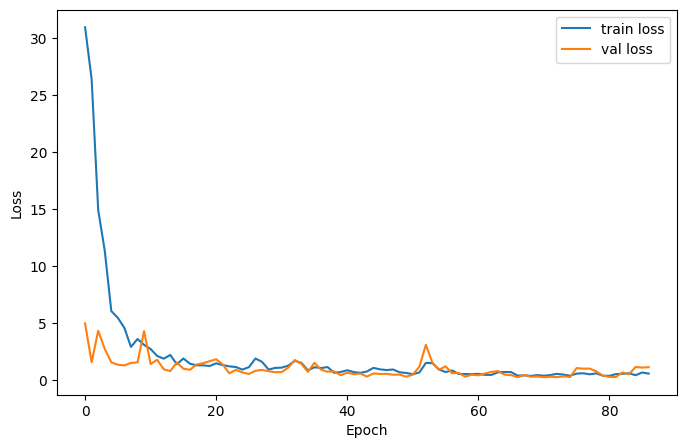

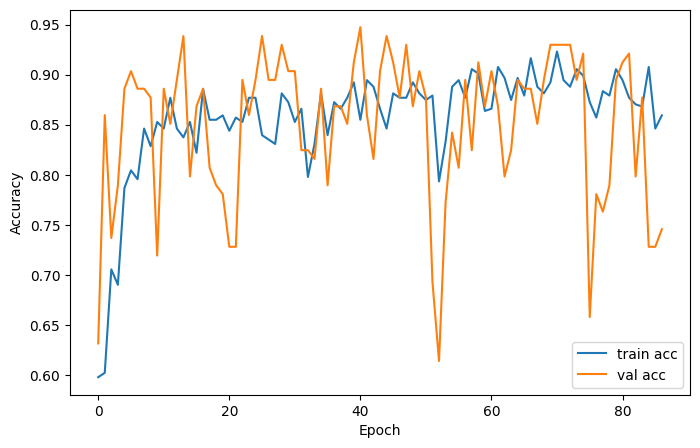

In [ ]:
# Example 5B: Visualize training curve

import matplotlib.pyplot as plt

# Plot train loss vs val loss
plt.figure(figsize=(8, 5))
plt.plot(bcw_history.history['loss'], label='train loss')
plt.plot(bcw_history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot train acc vs val acc
plt.figure(figsize=(8, 5))
plt.plot(bcw_history.history['accuracy'], label='train acc')
plt.plot(bcw_history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image12B.png)  

Here is an analysis of these two graphs:

#### **Top Graph: Loss vs. Epochs**

* **Training Loss (blue):**
* * Starts high and decreases steadily, indicating that the model is learning and fitting the training data well.
* **Validation Loss (orange):**
* * Initially decreases but then plateaus or increases, suggesting that the model begins to overfit after a certain number of epochs.
* * If validation loss increases while training loss continues to decrease, it's a classic sign of overfitting.

#### **Bottom Graph: Accuracy vs. Epochs**

* **Training Accuracy (blue):**
* * Increases steadily and approaches close to `1.0`, showing that the model is nearly perfectly fitting the training data.

* **Validation Accuracy (orange):**
* * Initially improves but then levels off or slightly declines, again pointing to **overfitting**—the model performs well on training data but not on unseen validation data.

#### **Interpretation**
The model is **learning well initially**, but after a certain point, it starts to memorize the training data rather than generalize.
This is evident from the **divergence between training and validation** metrics after a certain number of epochs.

### **Exercise 5A:  Construct, Compile and Train _Classification_ Neural Network**

In the cell below write the code to construct, compile and train a classification neural network called `hd_model` to analyze the data in the DataFrame `hdDF`.

**Code Hints:**


In [ ]:
# Insert your code for Exercise 5A here

from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 2️⃣ Split data
# ---------------------------------------------------------------------------
split_val = 0.8
split = int(split_val * hdX.shape[0])
x_train, x_val = hdX[:split], hdX[split:]
y_train, y_val = hdY[:split], hdY[split:]

# ---------------------------------------------------------------------------
# 3️⃣ Build and compile model
# ---------------------------------------------------------------------------
inputs = Input(shape=(hdX.shape[1],))
x = Dense(25, activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
outputs = Dense(hdY.shape[1], activation="softmax")(x)

# Create model
hd_model = Model(inputs, outputs)

# Compile model
hd_model.compile(
    loss="categorical_crossentropy",
    optimizer=OPTIMIZER,
    metrics=["accuracy"],
)

# ---------------------------------------------------------------------------
# 4️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "hd_best_classification_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=VERBOSE
    ),
]

# ---------------------------------------------------------------------------
# 5️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
hd_history = hd_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)

# ---------------------------------------------------------------------------
# 6️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(hd_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1/200
23/23 - 1s - 64ms/step - accuracy: 0.5395 - loss: 7.2220 - val_accuracy: 0.4620 - val_loss: 1.6189 - learning_rate: 1.0000e-03
Epoch 2/200
23/23 - 0s - 20ms/step - accuracy: 0.5817 - loss: 3.6007 - val_accuracy: 0.4674 - val_loss: 1.2352 - learning_rate: 1.0000e-03
Epoch 3/200
23/23 - 0s - 9ms/step - accuracy: 0.6063 - loss: 2.4488 - val_accuracy: 0.5489 - val_loss: 1.0612 - learning_rate: 1.0000e-03
Epoch 4/200
23/23 - 0s - 8ms/step - accuracy: 0.5872 - loss: 2.2057 - val_accuracy: 0.5924 - val_loss: 0.9656 - learning_rate: 1.0000e-03
Epoch 5/200
23/23 - 0s - 13ms/step - accuracy: 0.6267 - loss: 1.7798 - val_accuracy: 0.6250 - val_loss: 1.0617 - learning_rate: 1.0000e-03
Epoch 6/200
23/23 - 0s - 11ms/step - accuracy: 0.6158 - loss: 1.5484 - val_accuracy: 0.6033 - val_loss: 1.1686 - learning_rate: 1.0000e-03
Epoch 7/200
23/23 - 0s - 7ms/step - accuracy: 0.5926 - loss: 1.5964 - val_accuracy:

If the code is correct you should see something _similar_ to the following final output from the training

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image14B.png)  

### Example 5B:  Visualize Training Curves

In the cell below write the code to visualize the training curves for your `hd_model`.

**Code Hints:**

Change `bcw_history` to `hd_history`.

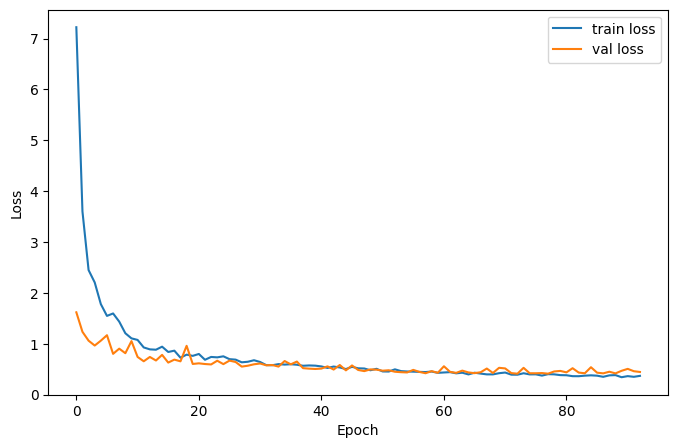

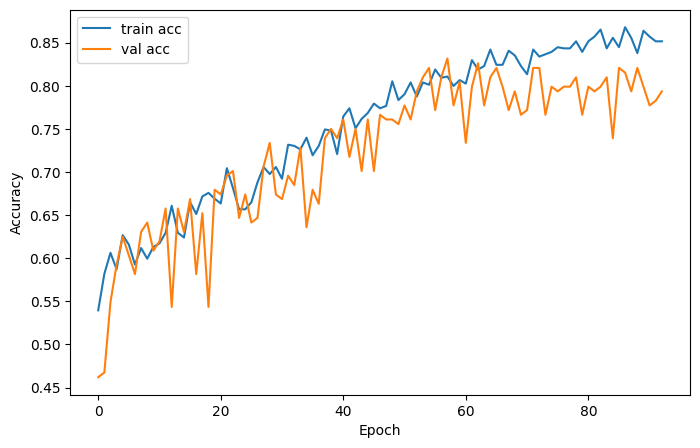

In [ ]:
# Example 5B: Visualize training curve

import matplotlib.pyplot as plt

# Plot train loss vs val loss
plt.figure(figsize=(8, 5))
plt.plot(hd_history.history['loss'], label='train loss')
plt.plot(hd_history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot train acc vs val acc
plt.figure(figsize=(8, 5))
plt.plot(hd_history.history['accuracy'], label='train acc')
plt.plot(hd_history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image15B.png)  

Here is an analysis of these two graphs:

#### **Top Graph: Loss vs. Epochs**

* **Training Loss (blue):**
* * Shows a **steady decline**, indicating that the model is successfully minimizing the loss on the training data.
* **Validation Loss (orange):**
* * Initially decreases, but then **flattens or slightly increases**, suggesting that the model starts to **overfit** after a certain number of epochs.

#### **Bottom Graph: Accuracy vs. Epochs**
* **Training Accuracy (blue):**
* * Increases consistently, approaching high values (likely near `1.0`), which means the model is fitting the training data very well.
* **Validation Accuracy (orange):**
* * Improves early on but then **plateaus or slightly declines**, again pointing to **overfitting**—the model performs well on training data but struggles to generalize.

#### **Overall Interpretation**
* The model is learning effectively during early epochs.
* After a certain point, generalization performance stagnates, as seen in the validation metrics.
* This is a classic case of **overfitting**, where the model memorizes training data but fails to perform well on unseen data.

## **Generate Feature Vectors for a Regression Neural Network**

As mentioned above, the procedure for generating X and Y feature vectors for a regression neural network is somewhat different the procedure used above. Even though these differences are not large, they are important. If your X and Y feature vectors are not generated in the correct format, your neural network will not compile and run.

### Example 6: Generate Feature Vectors for Regression Neural Network


For regression, we want to predict a variable that has a **_range of values_**. For Example 6, we will generate X and Y feature vectors for a regression neural network designed to predict the `mean_area` of tumor cell nuclei in the Breast Cancer Wisconsin dataset.

We begin by creating a new DataFrame from the same CSV file, but this we will call `areaDF`to remind us that is DataFrame is predicting the average (mean) area.  

After creating our DataFrame, our next step is to **_pre-process_** the data. There are a variety of data manipulation steps that come under the heading `pre-processing`. Some of these manipulations are optional while other step are required. One required data manipulation is to make sure all of the categorical values (i.e. strings) have been converted to numerical values.

For our regression neural network, we definitely want to include the column `diagnosis` as part of our X feature vector. It is certainly reasonable to assume that `mean_area` might be different in tumors that are `Malignant` than tumors that are `Benign`. However, since the column `diagnosis` contains string values (i.e. `M` and `B`) we will first need to convert these strings to numerical values.

We saw earlier that we could use One-Hot Encoding to make this conversion. In this example, we will use an alternative method called `mapping`. Mapping has the advantage over One-Hot Encoding, that it doesn't increase the number of columns. It's relative easy to employ, provided the number of different categorical values is relatively small as is it here.  

Here is the code chunk that maps the letter `M` to `1` and the letter `B` to `0`:
~~~text
mapping = {'M': 1, 'B': 0}
areaDF['diagnosis'] = areaDF['diagnosis'].map(mapping)
~~~~
From a purely mathematic perspective, you could assign these two string values to any integer without any effect on the accuracy of the regression neural network. However, the usual convention is to assign `1` to the "disease" condition, and `0` to the "non-diseased" condition.

Next, we need to create the Y feature vector. A very important difference between regression and catagorical networks, is how the Y feature vector is created. With regression, we simply assign the numerical values in the correct DataFrame column to our Numpy array as shown in this code chunk:
~~~text
areaY = areaDF['mean_area'].values
~~~

Finally, we print out the first 4 values in the X and Y feature vectors so we can make sure they have the correct format.


In [ ]:
from __future__ import annotations

import numpy as np
import pandas as pd
from pathlib import Path

# ------------------------------------------------------------------
# 1️⃣  Identify feature / target columns
# ------------------------------------------------------------------
TARGET_COL = "mean_area"  # continuous variable we want to predict

# ------------------------------------------------------------------
# 2️⃣  Pre‑processing pipeline
# ------------------------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numeric columns directly
categorical_cols = [col for col in bcwDF.columns if bcwDF[col].dtype == "object" and col != TARGET_COL]
numeric_cols = [col for col in bcwDF.columns if col != TARGET_COL and col not in categorical_cols]

numeric_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(drop="if_binary", sparse_output=False)),
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_cols),
        ("cat", categorical_pipe, categorical_cols),
    ]
)

# ------------------------------------------------------------------
# 3️⃣  Split into train / test sets
# ------------------------------------------------------------------
bcwX = bcwDF.drop(columns=[TARGET_COL])
bcwY = bcwDF[TARGET_COL].values.astype(np.float32)

test_size = 0.2

bcwX_train, bcwX_val, bcwY_train, bcwY_val = train_test_split(
    bcwX, bcwY,
    test_size=test_size,
    random_state=42,
    shuffle=True,
)

# ------------------------------------------------------------------
# 4️⃣  Fit the transformer on the training data
# ------------------------------------------------------------------
bcwX_train_proc = preprocess.fit_transform(bcwX_train)
bcwX_val_proc = preprocess.transform(bcwX_val)

# ------------------------------------------------------------------
# 5️⃣  Optional: scale the target
# ------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

scale_y = True
if scale_y:
    y_scaler = StandardScaler()
    bcwY_train = y_scaler.fit_transform(bcwY_train.reshape(-1, 1)).ravel()
    bcwY_val = y_scaler.transform(bcwY_val.reshape(-1, 1)).ravel()

# ------------------------------------------------------------------
# 6️⃣  Inspect the first few rows
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)
print("First 4 rows of processed X (bcwX_train_proc):")
print(bcwX_train_proc[:4])
print("\nCorresponding y (bcwY_train):")
print(bcwY_train[:4])


First 4 rows of processed X (bcwX_train_proc):
[[-1.4408 -0.4353 -1.3621  0.7806  0.7189  2.8231 -0.1191  1.0927  2.4582
  -0.2638 -0.0161 -0.4704 -0.4748  0.8384  3.251   8.4389  3.392   2.6212
   2.0612 -1.2329 -0.4763 -1.2479 -0.974   0.7229  1.1867  4.6728  0.932
   2.0972  1.8865  0.    ]
 [ 1.9741  1.733   2.0917  1.3198  3.4263  2.0131  2.665   2.127   1.5584
   0.8053 -0.8127  0.752   0.8772 -0.8961  1.1812  0.1836  0.6006 -0.3177
   0.5296  2.1733  1.3113  2.0816  2.1374  0.7619  3.2656  1.9286  2.6989
   1.8912  2.4978  1.    ]
 [-1.4    -1.2496 -1.3452 -1.3326 -0.3074 -0.3656 -0.6965  1.9303  0.9544
   0.0275  1.9631 -0.121  -0.3508  0.5728  0.7395  0.3207  0.5895  2.615
   0.7189 -1.2953 -1.0408 -1.2452 -0.9997 -1.4387 -0.5486 -0.6449 -0.9702
   0.5976  0.0579  0.    ]
 [-0.9818  1.4162 -0.9826  0.0594 -0.5968 -0.8202 -0.8451  0.3133  0.074
  -0.5385  0.5365 -0.6579 -0.4966  0.0655 -0.8224 -0.6856 -0.8985  0.1233
  -0.4315 -0.8292  1.5935 -0.8736 -0.7429  0.7966 -0.7294 -0.

If the code is correct you should see the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image16B.png)  

### **Exercise 6: Generate Feature Vectors for Regression Neural Network**



In [ ]:
# Insert your code for Exercise 6 here

from __future__ import annotations

import numpy as np
import pandas as pd
from pathlib import Path

# ------------------------------------------------------------------
# 1️⃣  Identify feature / target columns
# ------------------------------------------------------------------
TARGET_COL = "MaxHR"  # continuous variable we want to predict

# ------------------------------------------------------------------
# 2️⃣  Pre‑processing pipeline
# ------------------------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numeric columns directly
categorical_cols = [col for col in hdDF.columns if hdDF[col].dtype == "object" and col != TARGET_COL]
numeric_cols = [col for col in hdDF.columns if col != TARGET_COL and col not in categorical_cols]

numeric_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(drop="if_binary", sparse_output=False)),
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_cols),
        ("cat", categorical_pipe, categorical_cols),
    ]
)

# ------------------------------------------------------------------
# 3️⃣  Split into train / test sets
# ------------------------------------------------------------------
hdX = hdDF.drop(columns=[TARGET_COL])
hdY = hdDF[TARGET_COL].values.astype(np.float32)

test_size = 0.2

hdX_train, hdX_val, hdY_train, hdY_val = train_test_split(
    hdX, hdY,
    test_size=test_size,
    random_state=42,
    shuffle=True,
)

# ------------------------------------------------------------------
# 4️⃣  Fit the transformer on the training data
# ------------------------------------------------------------------
hdX_train_proc = preprocess.fit_transform(hdX_train)
hdX_val_proc = preprocess.transform(hdX_val)

# ------------------------------------------------------------------
# 5️⃣  Optional: scale the target
# ------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

scale_y = True
if scale_y:
    y_scaler = StandardScaler()
    hdY_train = y_scaler.fit_transform(hdY_train.reshape(-1, 1)).ravel()
    hdY_val = y_scaler.transform(hdY_val.reshape(-1, 1)).ravel()

# ------------------------------------------------------------------
# 6️⃣  Inspect the first few rows
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)
print("First 4 rows of processed X (hdX_train_proc):")
print(hdX_train_proc[:4])
print("\nCorresponding y (hdY_train):")
print(hdY_train[:4])

First 4 rows of processed X (hdX_train_proc):
[[-1.2451 -0.709   0.3728 -0.0971 -1.0974 -0.5406  0.5406 -1.0974 -0.4833
   1.8791 -0.2135 -0.5047  0.8082 -0.4876  0.8385 -0.8385  3.7804 -1.0333
  -0.8479]
 [-1.8862 -0.1663  0.0861 -0.8363 -1.0974 -0.5406  0.5406 -1.0974 -0.4833
   1.8791 -0.2135 -0.5047  0.8082 -0.4876  0.8385 -0.8385 -0.2645 -1.0333
   1.1794]
 [ 0.251   0.9191  0.1231  0.0877  0.9113 -0.5406  0.5406  0.9113 -0.4833
  -0.5322 -0.2135 -0.5047  0.8082 -0.4876 -1.1927  1.1927 -0.2645  0.9678
  -0.8479]
 [-1.7794 -0.1663  0.1046 -0.8363 -1.0974  1.8498 -1.8498 -1.0974 -0.4833
   1.8791 -0.2135 -0.5047  0.8082 -0.4876  0.8385 -0.8385 -0.2645 -1.0333
   1.1794]]

Corresponding y (hdY_train):
[ 2.2844  1.6522 -0.4416  0.23  ]


If the code is correct you should see the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image17B.png)  

### Example 7: Construct, Compile and Train Regression Neural Network

In [ ]:
# Example 7: Construct, Compile and Train Regression Neural Network

from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE = 2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)


# ---------------------------------------------------------------------------
# 2️⃣ Build and compile regression model
# ---------------------------------------------------------------------------
inputs = Input(shape=(bcwX.shape[1],))
x = Dense(25, activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
outputs = Dense(1)(x)  # Single output for regression

# Create model
bcw_model = Model(inputs, outputs)

# Compile model
bcw_model.compile(
    loss="mean_squared_error",  # or "mae"
    optimizer=OPTIMIZER,
    metrics=["mae"],  # Mean Absolute Error
)

# ---------------------------------------------------------------------------
# 3️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "bcw_best_regression_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=VERBOSE
    ),
]

# ---------------------------------------------------------------------------
# 4️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (regression) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
bcw_history = bcw_model.fit(
    bcwX_train_proc,
    bcwY_train,
    validation_data=(bcwX_val_proc, bcwY_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)


# ---------------------------------------------------------------------------
# 5️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation MAE:", min(bcw_history.history["val_mae"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")


-- Training (regression) is starting for 200 epochs ----------------------------
Epoch 1/200
15/15 - 1s - 93ms/step - loss: 1.4295 - mae: 0.7881 - val_loss: 0.7122 - val_mae: 0.5675 - learning_rate: 1.0000e-03
Epoch 2/200
15/15 - 0s - 11ms/step - loss: 0.7461 - mae: 0.5688 - val_loss: 0.3173 - val_mae: 0.3788 - learning_rate: 1.0000e-03
Epoch 3/200
15/15 - 0s - 23ms/step - loss: 0.3695 - mae: 0.4092 - val_loss: 0.1694 - val_mae: 0.2997 - learning_rate: 1.0000e-03
Epoch 4/200
15/15 - 0s - 22ms/step - loss: 0.2452 - mae: 0.3469 - val_loss: 0.0961 - val_mae: 0.2391 - learning_rate: 1.0000e-03
Epoch 5/200
15/15 - 0s - 20ms/step - loss: 0.2309 - mae: 0.3147 - val_loss: 0.0751 - val_mae: 0.2115 - learning_rate: 1.0000e-03
Epoch 6/200
15/15 - 0s - 19ms/step - loss: 0.1408 - mae: 0.2809 - val_loss: 0.0621 - val_mae: 0.1886 - learning_rate: 1.0000e-03
Epoch 7/200
15/15 - 0s - 19ms/step - loss: 0.1102 - mae: 0.2475 - val_loss: 0.0533 - val_mae: 0.1707 - learning_rate: 1.0000e-03
Epoch 8/200
15/1

If the code is correct you should see something _similar_ to the following final output from the training

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image22B.png)  

### **Exercise 7: Construct, Compile and Train Regression Neural Network**

In [ ]:
# Insert your code for Exercise 7 here

from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE = 2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)


# ---------------------------------------------------------------------------
# 2️⃣ Build and compile regression model
# ---------------------------------------------------------------------------
inputs = Input(shape=(hdX.shape[1],))
x = Dense(25, activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
outputs = Dense(1)(x)  # Single output for regression

# Create model
hd_model = Model(inputs, outputs)

# Compile model
hd_model.compile(
    loss="mean_squared_error",  # or "mae"
    optimizer=OPTIMIZER,
    metrics=["mae"],  # Mean Absolute Error
)

# ---------------------------------------------------------------------------
# 3️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "hd_best_regression_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=VERBOSE
    ),
]

# ---------------------------------------------------------------------------
# 4️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (regression) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
hd_history = hd_model.fit(
    hdX_train_proc,
    hdY_train,
    validation_data=(hdX_val_proc, hdY_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)


# ---------------------------------------------------------------------------
# 5️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation MAE:", min(hd_history.history["val_mae"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")

-- Training (regression) is starting for 200 epochs ----------------------------
Epoch 1/200
23/23 - 2s - 81ms/step - loss: 1.0633 - mae: 0.8319 - val_loss: 0.9134 - val_mae: 0.7634 - learning_rate: 1.0000e-03
Epoch 2/200
23/23 - 0s - 18ms/step - loss: 0.8398 - mae: 0.7417 - val_loss: 0.8473 - val_mae: 0.7133 - learning_rate: 1.0000e-03
Epoch 3/200
23/23 - 0s - 13ms/step - loss: 0.7852 - mae: 0.7061 - val_loss: 0.8282 - val_mae: 0.7088 - learning_rate: 1.0000e-03
Epoch 4/200
23/23 - 0s - 13ms/step - loss: 0.7570 - mae: 0.7009 - val_loss: 0.8156 - val_mae: 0.7026 - learning_rate: 1.0000e-03
Epoch 5/200
23/23 - 0s - 12ms/step - loss: 0.6982 - mae: 0.6716 - val_loss: 0.8074 - val_mae: 0.6952 - learning_rate: 1.0000e-03
Epoch 6/200
23/23 - 0s - 14ms/step - loss: 0.7099 - mae: 0.6805 - val_loss: 0.7980 - val_mae: 0.6869 - learning_rate: 1.0000e-03
Epoch 7/200
23/23 - 0s - 12ms/step - loss: 0.6771 - mae: 0.6609 - val_loss: 0.7916 - val_mae: 0.6901 - learning_rate: 1.0000e-03
Epoch 8/200
23/2

If the code is correct you should see something _similar_ to the following final output from the training

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image23B.png)  

### Example 8: Evaluate the Model

In [ ]:
# Example 8: Evaluate the model

# Print MAE
val_metrics = bcw_model.evaluate(bcwX_val_proc, bcwY_val, verbose=0)
print(f"\nValidation MAE (raw units) = {val_metrics[1]:.4f}")

# Convert MAE back to original units before scaling
mae_raw = y_scaler.inverse_transform(np.array([[val_metrics[1]]]))[0, 0]
print(f"Validation MAE (original units) = {mae_raw:.4f}")



Validation MAE (raw units) = 0.1137
Validation MAE (original units) = 694.6954


If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image24B.png)  

### **Exercise 8: Evaluate the Model**

In [ ]:
# ✅ Print MAE in raw (scaled) units
val_metrics = hd_model.evaluate(hdX_val_proc, hdY_val, verbose=0)
print(f"\nValidation MAE (raw units) = {val_metrics[1]:.4f}")

# ✅ Convert MAE back to original units using the scaler's scale_
mae_original_units = val_metrics[1] * y_scaler.scale_[0]
print(f"Validation MAE (original units) = {mae_original_units:.4f}")



Validation MAE (raw units) = 0.6908
Validation MAE (original units) = 244.9244


In [ ]:
# Insert your code for Exercise 8 here

# Print MAE
val_metrics = hd_model.evaluate(hdX_val_proc, hdY_val, verbose=0)
print(f"\nValidation MAE (raw units) = {val_metrics[1]:.4f}")

# Convert MAE back to original units before scaling
mae_raw = y_scaler.inverse_transform(np.array([[val_metrics[1]]]))[0, 0]
print(f"Validation MAE (original units) = {mae_raw:.4f}")



Validation MAE (raw units) = 0.6908
Validation MAE (original units) = 899.3020


If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image25B.png)  

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


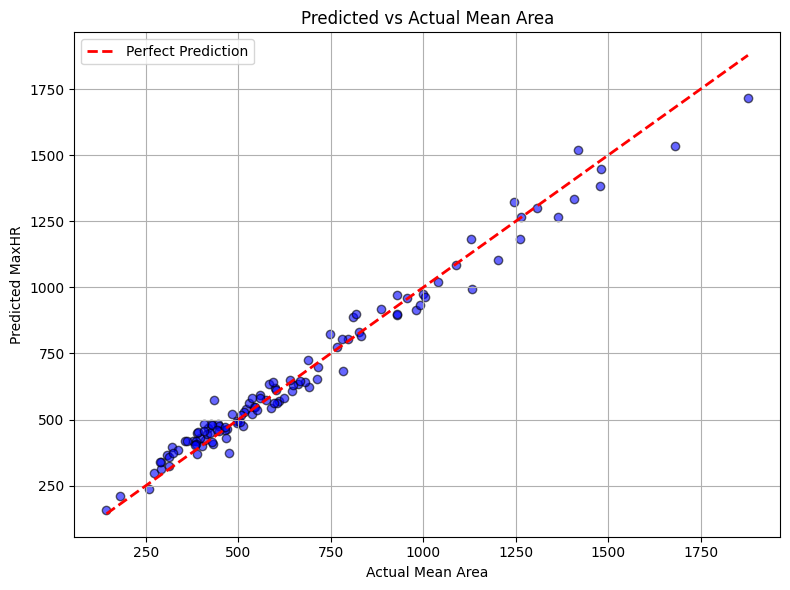

In [ ]:
# Insert your code for Exercise 9 here

import numpy as np
import matplotlib.pyplot as plt

# Predict on validation set
y_pred_scaled = bcw_model.predict(bcwX_val_proc)

# Inverse transform predictions and actual values
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = y_scaler.inverse_transform(bcwY_val.reshape(-1, 1)).ravel()

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Mean Area")
plt.ylabel("Predicted MaxHR")
plt.title("Predicted vs Actual Mean Area")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image27B.png)  

Based on the scatter plot of Predicted vs. Actual Mean Area in the Wisconsin Breast Cancer dataset, we can conclude the following:

#### **Model Performance Summary:**
* **Strong alignment with the red dashed line** (Perfect Prediction) indicates that the model's predictions are very close to the actual values.
* The **tight clustering of blue dots** around the line suggests **low error and high accuracy**.
* There are no major outliers or systematic deviations, which implies the model generalizes well across the dataset.

#### **Conclusion:**
The regression model is performing **very well** in predicting `mean_area` of tumors. Its predictions are both **reliable** and **consistent**, making it a strong candidate for use in clinical or diagnostic support settings where accurate tumor size estimation is important.

### **Exercise 9:**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


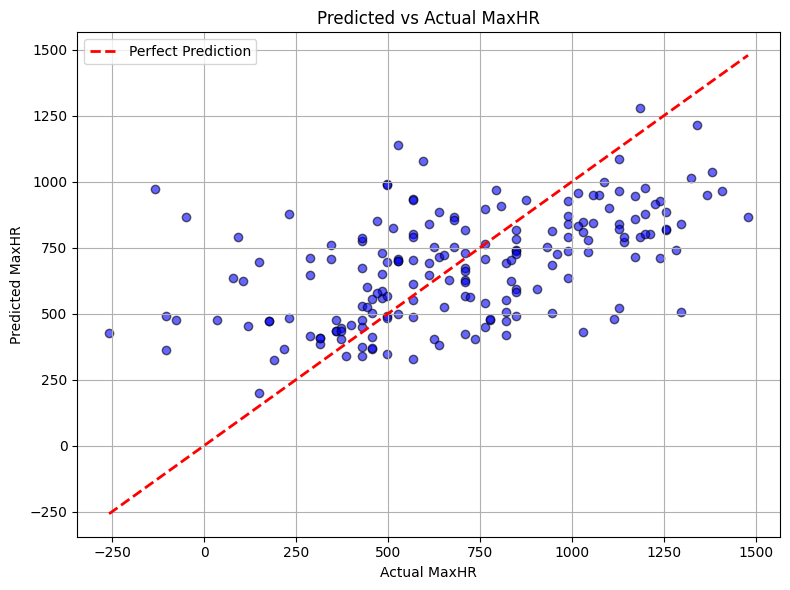

In [ ]:
# Insert your code for Exercise 9 here

import numpy as np
import matplotlib.pyplot as plt

# Predict on validation set
y_pred_scaled = hd_model.predict(hdX_val_proc)

# Inverse transform predictions and actual values
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = y_scaler.inverse_transform(hdY_val.reshape(-1, 1)).ravel()

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual MaxHR")
plt.ylabel("Predicted MaxHR")
plt.title("Predicted vs Actual MaxHR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


If the code is correct you should see something _similar_ to the following output

![_ _](https://biologicslab.co/BIO1173/images/class_02/class_02_2_image26B.png)  

Based on the scatter plot of **Predicted vs Actual MaxHR** from the Heart Disease dataset, here’s what we can conclude:

#### **Model Performance Insights:**
* The **red dashed line** represents **perfect predictions** — where predicted values exactly match actual values.
* The **blue dots** (data points) show a **noticeable spread** around this line, indicating that the model's predictions are not consistently accurate.
* Some predictions are close to the line, but many are **significantly off**, suggesting **moderate to high error**.

#### **Implications:**
* The model may be **underfitting** — not capturing enough complexity in the data.
* There could be **missing or weakly predictive features** in the input data.
The variability in prediction accuracy suggests the model might benefit from:
* * More expressive architecture
* * Feature engineering
* * Hyperparameter tuning
* * Possibly using ensemble methods or alternative regression algorithms

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_04_1.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## Appendix

The code in the cells use the Pandas method `pd.describe()` to print out a statistical summary of the column `mean_area` in the `Wisconsin Breast Cancer` dataset and the column `MaxHR` in the `Heart Disease` dataset.

In [ ]:
bcwDF['mean_area'].describe()

,mean_area
count,569.000000
mean,654.889104
std,351.914129
...,...
50%,551.100000
75%,782.700000
max,2501.000000


The **mean_area** variable shows a wide range of tumor sizes with a positively skewed distribution. This suggests that while most tumors are relatively small to moderately sized, there are a few with very large areas that could be clinically significant and may warrant further investigation.

In [ ]:
hdDF['MaxHR'].describe()

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
...,...
50%,138.000000
75%,156.000000
max,202.000000


The **MaxHR** variable shows a relatively symmetric distribution with a moderate spread. Most individuals have a maximum heart rate between **110** and **160**, but there are a few with very high values (up to 202), which could be outliers or clinically significant cases.

## **Poly-A Tail**

## **UNIVAC**

![___](https://upload.wikimedia.org/wikipedia/commons/2/2f/Univac_I_Census_dedication.jpg)

**UNIVAC (Universal Automatic Computer)** was a line of electronic digital stored-program computers starting with the products of the Eckert–Mauchly Computer Corporation. Later the name was applied to a division of the Remington Rand company and successor organizations.

### **Historical Overview of UNIVAC**

**UNIVAC** (Universal Automatic Computer) was the first commercially produced digital computer in the United States. It was designed primarily for business and administrative use, marking a significant shift from earlier computers that were mostly used for scientific and military purposes.

#### Key Milestones

- **1946–1951**: Developed by **J. Presper Eckert** and **John Mauchly**, the creators of the ENIAC, under the company **Eckert-Mauchly Computer Corporation**.
- **1951**: The first UNIVAC I was delivered to the **U.S. Census Bureau**.
- **1952**: UNIVAC I gained national attention when it successfully predicted the outcome of the U.S. presidential election on live television, favoring Eisenhower over Stevenson.

#### Technical Specifications

- **Memory**: Used mercury delay lines for memory storage.
- **Storage**: Featured magnetic tape for data storage, a novel concept at the time.
- **Speed**: Could perform about 1,000 calculations per second.
- **Size**: Occupied over 35 square meters and weighed approximately 13 tons.

#### Impact and Legacy

- UNIVAC I was the first computer to be widely used for **business applications**, including payroll, inventory, and accounting.
- It helped establish the **commercial computer industry**, paving the way for companies like IBM to enter the market.
- The name "UNIVAC" became synonymous with "computer" in the 1950s and early 1960s.

#### Fun Fact

The UNIVAC I's prediction of the 1952 election was so unexpected that CBS initially hesitated to air it. The prediction turned out to be accurate, boosting public confidence in computing technology.

---

> UNIVAC represents a pivotal moment in computing history, transitioning from experimental machines to practical tools that shaped modern data processing.


The BINAC, built by the Eckert–Mauchly Computer Corporation, was the first general-purpose computer for commercial use, but it was not a success. The last UNIVAC-badged computer was produced in 1986.

### **History and structure**

**UNIVAC Sperry Rand label**

J. Presper Eckert and John Mauchly built the ENIAC (Electronic Numerical Integrator and Computer) at the University of Pennsylvania's Moore School of Electrical Engineering between 1943 and 1946. A 1946 patent rights dispute with the university led Eckert and Mauchly to depart the Moore School to form the Electronic Control Company, later renamed Eckert–Mauchly Computer Corporation (EMCC), based in Philadelphia, Pennsylvania. That company first built a computer called BINAC (BINary Automatic Computer) for Northrop Aviation (which was little used, or perhaps not at all). Afterwards, the development of UNIVAC began in April 1946.[1] UNIVAC was first intended for the Bureau of the Census, which paid for much of the development, and then was put in production.

With the death of EMCC's chairman and chief financial backer Henry L. Straus in a plane crash on October 25, 1949, EMCC was sold to typewriter, office machine, electric razor, and gun maker Remington Rand on February 15, 1950. Eckert and Mauchly now reported to Leslie Groves, the retired army general who had previously managed building The Pentagon and led the Manhattan Project.

The most famous UNIVAC product was the UNIVAC I mainframe computer of 1951, which became known for predicting the outcome of the U.S. presidential election the following year: this incident is noteworthy because the computer correctly predicted an Eisenhower landslide over Adlai Stevenson, whereas the final Gallup poll had Eisenhower winning the popular vote 51–49 in a close contest.

The prediction led CBS's news boss in New York, Siegfried Mickelson, to believe the computer was in error, and he refused to allow the prediction to be read. Instead, the crew showed some staged theatrics that suggested the computer was not responsive, and announced it was predicting 8–7 odds for an Eisenhower win (the actual prediction was 100–1 in his favour).

When the predictions proved true—Eisenhower defeated Stevenson in a landslide, with UNIVAC coming within 3.5% of his popular vote total and four votes of his Electoral College total—Charles Collingwood, the on-air announcer, announced that they had failed to believe the earlier prediction.

The United States Army requested a UNIVAC computer from Congress in 1951. Colonel Wade Heavey explained to the Senate subcommittee that the national mobilization planning involved multiple industries and agencies: "This is a tremendous calculating process...there are equations that can not be solved by hand or by electrically operated computing machines because they involve millions of relationships that would take a lifetime to figure out." Heavey told the subcommittee it was needed to help with mobilization and other issues similar to the invasion of Normandy that were based on the relationships of various groups.

The UNIVAC was manufactured at Remington Rand's former Eckert-Mauchly Division plant on W Allegheny Avenue in Philadelphia, Pennsylvania. Remington Rand also had an engineering research lab in Norwalk, Connecticut, and later bought Engineering Research Associates (ERA) in St. Paul, Minnesota. In 1953 or 1954 Remington Rand merged their Norwalk tabulating machine division, the ERA "scientific" computer division, and the UNIVAC "business" computer division into a single division under the UNIVAC name. This severely annoyed those who had been with ERA and with the Norwalk laboratory.

In 1955 Remington Rand merged with Sperry Corporation to become Sperry Rand. General Douglas MacArthur, then the chairman of the Board of Directors of Remington Rand, was chosen to continue in that role in the new company. Harry Franklin Vickers, then the President of Sperry Corporation, continued as president and CEO of Sperry Rand. The UNIVAC division of Remington Rand was renamed the Remington Rand Univac division of Sperry Rand. William Norris was put in charge as Vice-President and General Manager reporting to the President of the Remington Rand Division (of Sperry Rand).